In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


## This is a dataset of electric vehicles.

Some basic tasks would include

* Which car has the fastest 0-100 acceleration?
* Which has the highest efficiency?
* Does a difference in power train effect the range, top speed, efficiency?
* Which manufacturer has the most number of vehicles?
* How does price relate to rapid charging?


In [5]:
df = pd.read_csv("EV's/ElectricCarData_Clean.csv")

df.head()


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [6]:
# Take a look on the features this dataset holds 

df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

# Quality Assesment 

In [7]:
# Data Completence

# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Print the missing values count and percentage for each column
print("\nMissing Values Percentage:")
print(missing_percentage)


Missing Values Percentage:
Brand              0.0
Model              0.0
AccelSec           0.0
TopSpeed_KmH       0.0
Range_Km           0.0
Efficiency_WhKm    0.0
FastCharge_KmH     0.0
RapidCharge        0.0
PowerTrain         0.0
PlugType           0.0
BodyStyle          0.0
Segment            0.0
Seats              0.0
PriceEuro          0.0
dtype: float64


In [8]:
# Check data conformity 

# Check for duplicate rows
duplicate_rows = df.duplicated()
duplicate_rows_count = duplicate_rows.sum()

# Check for inconsistent values within columns
inconsistent_values = []
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) > 1:
        inconsistent_values.append(column)

# Print the results
print("Duplicate Rows Count:", duplicate_rows_count)
print("Inconsistent Columns:", inconsistent_values)

Duplicate Rows Count: 0
Inconsistent Columns: ['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro']


In [ ]:
for column in df.columns:
    dtype = df[column].dtype
    unique_values = df[column].unique()
    print(f"The ({column}) column holding data of type ({dtype}) \n and has values of ({unique_values})")


### Observation 

We checked the Completence,Conformity,integrity and accuracy of the data.

The data is very good quality wise and ready for analysis


# Analysis and answering questions 

Now that we have the data ready we can start answering the questions we need from the dataset

## #1 What is the fastest acceleration from 0-100 

In [10]:

# Initialize variable to store fastest acceleration 
fastest_acceleration = float(0)

# Initialize variable to store fastest car name
fastest_brand=''
fastest_model= ''

index=0

for accele in df['AccelSec']:
        if accele and float(accele) > fastest_acceleration:
            fastest_acceleration = float(accele)
            car_model = df['Model'][index]
            car_brand = df['Brand'][index]
        index+=1    

print(f"fastest car {car_brand, car_model} it's acceleration {fastest_acceleration}")            

fastest car ('Renault ', 'Kangoo Maxi ZE 33') it's acceleration 22.4


## # 2 Which has the highest efficiency?

In [11]:

highest_efficiency = 0
car_model = ""
car_brand=" "


index=0
for car in df.index:
    efficiency_whkm = df['Efficiency_WhKm'][car]
    if efficiency_whkm and float(efficiency_whkm) > highest_efficiency:
        highest_efficiency = float(efficiency_whkm)
        car_model = df['Model'][car]
        car_brand= df['Brand'][car]
       


print("The car with the highest efficiency is:",car_brand, car_model,"with efficiency of :", highest_efficiency ,"Wh/km")        

The car with the highest efficiency is: Mercedes  EQV 300 Long with efficiency of : 273.0 Wh/km


## #3  Does a difference in power train effect the range, top speed, efficiency?

In [12]:

# First let's look at the power train values 
df['PowerTrain'].unique()

array(['AWD', 'RWD', 'FWD'], dtype=object)

### so there are three types of powerTrain (`AWD`-`RWD`-`FWD`)

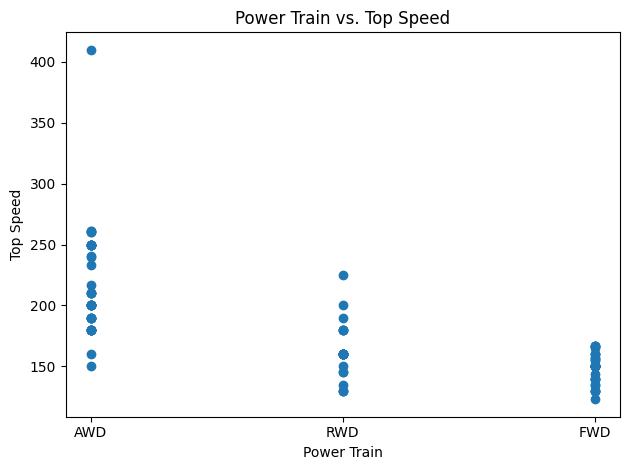

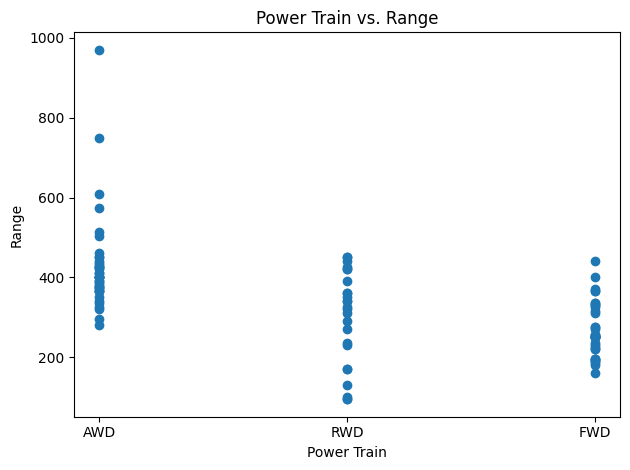

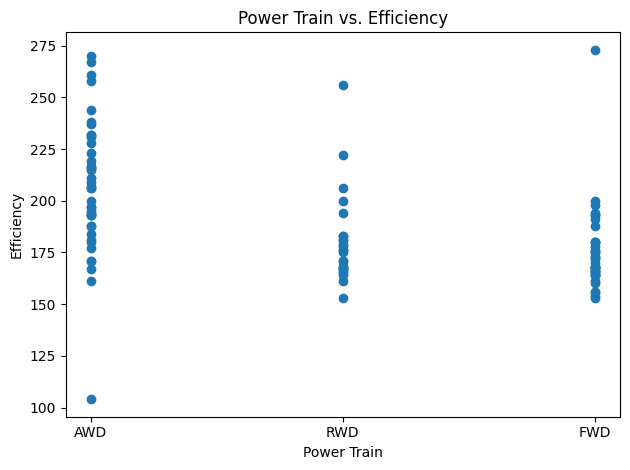

In [35]:
# Create a scatter plot

plt.scatter(df['PowerTrain'], df['TopSpeed_KmH'])

# Add labels and title
plt.xlabel("Power Train")
plt.ylabel("Top Speed")
plt.title("Power Train vs. Top Speed")

# Adjust spacing between plots
plt.tight_layout()

# Show the plot
plt.show()


# Create a scatter plot
plt.scatter(df['PowerTrain'], df['Range_Km'])

# Add labels and title
plt.xlabel("Power Train")
plt.ylabel("Range")
plt.title("Power Train vs. Range")

# Adjust spacing between plots
plt.tight_layout()

# Show the plot
plt.show()



# Create a scatter plot
plt.scatter(df['PowerTrain'], df['Efficiency_WhKm'])
 
 
# Add labels and title
plt.xlabel("Power Train")
plt.ylabel("Efficiency")
plt.title("Power Train vs. Efficiency")


# Adjust spacing between plots
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
# We can calculate the mean average of each to compare as well

awd_speed_sum= df[df['PowerTrain']=="AWD"]['TopSpeed_KmH'].sum()
rwd_speed_sum= df[df['PowerTrain']=="RWD"]['TopSpeed_KmH'].sum()
fwd_speed_sum= df[df['PowerTrain']=="FWD"]['TopSpeed_KmH'].sum()

awd_speed_count= df[df['PowerTrain']=="AWD"]['TopSpeed_KmH'].count()
rwd_speed_count= df[df['PowerTrain']=="RWD"]['TopSpeed_KmH'].count()
fwd_speed_count= df[df['PowerTrain']=="FWD"]['TopSpeed_KmH'].count()


avg_speed_awd= awd_speed_sum/awd_speed_count
avg_speed_rwd= rwd_speed_sum/rwd_speed_count
avg_speed_fwd= fwd_speed_sum/fwd_speed_count

print(f"Average top speed on AWD is : {avg_speed_awd} \n Average top speed on RWD is : {avg_speed_rwd} \n Average top speed on FWD is : {avg_speed_fwd} \n")

Average top speed on AWD is : 216.90243902439025 
 Average top speed on RWD is : 162.4 
 Average top speed on FWD is : 148.75675675675674 



### Observation 

The difference in power train affects the top speed of the car

In [28]:
# now let's see if it affects Range the car can travel in a full charge

awd_range_sum= df[df['PowerTrain']=="AWD"]['Range_Km'].sum()
rwd_range_sum= df[df['PowerTrain']=="RWD"]['Range_Km'].sum()
fwd_range_sum= df[df['PowerTrain']=="FWD"]['Range_Km'].sum()

awd_range_count= df[df['PowerTrain']=="AWD"]['Range_Km'].count()
rwd_range_count= df[df['PowerTrain']=="RWD"]['Range_Km'].count()
fwd_range_count= df[df['PowerTrain']=="FWD"]['Range_Km'].count()


avg_range_awd= awd_range_sum/awd_range_count
avg_range_rwd= rwd_range_sum/rwd_range_count
avg_range_fwd= fwd_range_sum/fwd_range_count

print(f"Average range on AWD is : {avg_range_awd} \n Average range on RWD is : {avg_range_rwd} \n Average range on FWD is : {avg_range_fwd} \n")

Average range on AWD is : 426.4634146341463 
 Average range on RWD is : 299.4 
 Average range on FWD is : 268.2432432432432 



### Observation 

The AWD power train is very different and distinct from the RWD and FWD range wise, while RWD and FWD are very close 

In [29]:
# now let's see if it affects Effeciency of the car

awd_eff_sum= df[df['PowerTrain']=="AWD"]['Efficiency_WhKm'].sum()
rwd_eff_sum= df[df['PowerTrain']=="RWD"]['Efficiency_WhKm'].sum()
fwd_eff_sum= df[df['PowerTrain']=="FWD"]['Efficiency_WhKm'].sum()

awd_eff_count= df[df['PowerTrain']=="AWD"]['Efficiency_WhKm'].count()
rwd_eff_count= df[df['PowerTrain']=="RWD"]['Efficiency_WhKm'].count()
fwd_eff_count= df[df['PowerTrain']=="FWD"]['Efficiency_WhKm'].count()


avg_eff_awd= awd_eff_sum/awd_eff_count
avg_eff_rwd= rwd_eff_sum/rwd_eff_count
avg_eff_fwd= fwd_eff_sum/fwd_eff_count

print(f"Average Effeciency on AWD is : {avg_eff_awd} \n Average Effeciency on RWD is : {avg_eff_rwd} \n Average Effeciency on FWD is : {avg_eff_fwd} \n")

Average Effeciency on AWD is : 206.7560975609756 
 Average Effeciency on RWD is : 180.44 
 Average Effeciency on FWD is : 175.56756756756758 



### Observation 

We see once more that AWD power train is a bit different and distinct from the RWD and FWD , while RWD and FWD are very close 

## #4 Which manufacturer has the most number of vehicles?

In [62]:
brands=df['Brand'].unique()
brands[6]

'Peugeot '

In [63]:
sum=df[df['Brand']==brands[6]].__len__()
sum

2

In [66]:
# We can use a for loop to find the answer 

most_cars=0
highest_brand=''

for brand in df['Brand'].unique():
    sum = df[df['Brand']==brand].__len__()
    if sum > most_cars:
        most_cars=sum
        highest_brand=brand
        
print(f"The manufacturer with the most number of vehicles is : {highest_brand} with {most_cars} cars out of {df.__len__()} from {df['Brand'].unique().__len__()} manufacturer")        

The manufacturer with the most number of vehicles is : Tesla  with 13 cars out of 103 from 33 manufacturer


## #5 How does price relate to rapid charging?

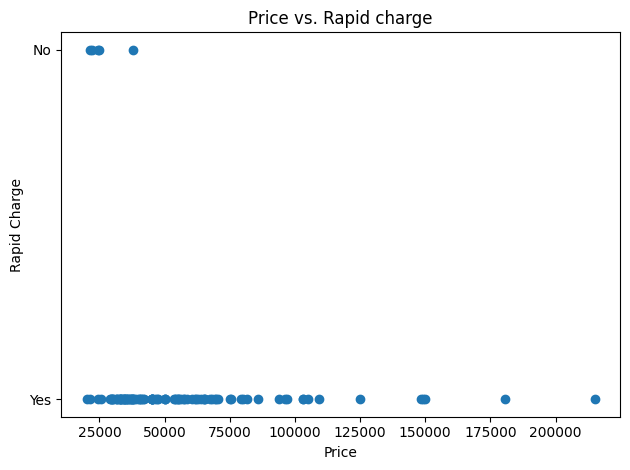

In [88]:
plt.scatter(df['PriceEuro'],df['RapidCharge'])

# Add labels and title
plt.xlabel("Price")
plt.ylabel("Rapid Charge")
plt.title("Price vs. Rapid charge")

# Adjust spacing between plots
plt.tight_layout()

# Show the plot
plt.show()

In [84]:
no_rapid_charge= df[df['RapidCharge']=="No"]

no_prices= no_rapid_charge['PriceEuro']

In [82]:
yes_rapid_charge = df[df['RapidCharge']=="Yes"]

yes_prices= yes_rapid_charge['PriceEuro']

In [85]:
no_prices.min()

21387

In [83]:
yes_prices.min()

20129

## Observation 

The price is not certainly a factor for the car to have a rapid charge or not, `BUT` of course it also depends on many factors such as *brand*, *Effeciency*,*Powertrain* etc..